# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
Soup = soup(html, 'html.parser')

In [7]:
# Extract all rows of data
# Using Pandas to read the HTML and extract tables
tables = pd.read_html(html)
# Assuming there is only one table
df_mars = tables[0]
df_mars



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
#Exploring the data types
df_mars.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [14]:
# Converting 'terrestrial_date' column to datetime
df_mars['terrestrial_date'] = pd.to_datetime(df_mars['terrestrial_date'])

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
rows_list = []
# Loop through the scraped data to create a list of rows
#iterating through rows index and rows info using iterrows
for index, row in df_mars.iterrows():
    row_dict = row.to_dict()
    rows_list.append(row_dict)
rows_list

[{'id': 2,
  'terrestrial_date': Timestamp('2012-08-16 00:00:00'),
  'sol': 10,
  'ls': 155,
  'month': 6,
  'min_temp': -75.0,
  'pressure': 739.0},
 {'id': 13,
  'terrestrial_date': Timestamp('2012-08-17 00:00:00'),
  'sol': 11,
  'ls': 156,
  'month': 6,
  'min_temp': -76.0,
  'pressure': 740.0},
 {'id': 24,
  'terrestrial_date': Timestamp('2012-08-18 00:00:00'),
  'sol': 12,
  'ls': 156,
  'month': 6,
  'min_temp': -76.0,
  'pressure': 741.0},
 {'id': 35,
  'terrestrial_date': Timestamp('2012-08-19 00:00:00'),
  'sol': 13,
  'ls': 157,
  'month': 6,
  'min_temp': -74.0,
  'pressure': 732.0},
 {'id': 46,
  'terrestrial_date': Timestamp('2012-08-20 00:00:00'),
  'sol': 14,
  'ls': 157,
  'month': 6,
  'min_temp': -74.0,
  'pressure': 740.0},
 {'id': 57,
  'terrestrial_date': Timestamp('2012-08-21 00:00:00'),
  'sol': 15,
  'ls': 158,
  'month': 6,
  'min_temp': -78.0,
  'pressure': 740.0},
 {'id': 68,
  'terrestrial_date': Timestamp('2012-08-22 00:00:00'),
  'sol': 16,
  'ls': 158,
 

In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df_mars_2 = pd.DataFrame(rows_list, columns=column_names)


In [20]:
# Confirm DataFrame was created successfully
df_mars_2.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
df_mars_2.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [26]:
# 1. How many months are there on Mars?
# Find unique months in the "month" column
import numpy as np
unique_months = df_mars_2['month'].unique()
unique_months_sorted = np.sort(unique_months)
num_months = len(unique_months)
print("Unique Months on Mars:")
print(unique_months_sorted)
print("Number of Unique Months:", num_months)

Unique Months on Mars:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Number of Unique Months: 12


In [32]:
# 2. How many Martian days' worth of data are there?
# Calculate the number of Martian sol days
max_sol = df_mars_2['sol'].max()
print(max_sol)
min_sol = df_mars_2['sol'].min()
print(min_sol)
sol_days = max_sol - min_sol + 1  # Adding 1 to include both the first and last sol

# Display the number of Martian sol days
print("Number of Martian Sol Days in the Dataset:", sol_days)

1977
10
Number of Martian Sol Days in the Dataset: 1968


In [33]:
# 3. What is the average low temperature by month?
# Group the data by month and calculate the average low temperature
average_low_temp_by_month = df_mars_2.groupby('month')['min_temp'].mean()
# Display the result
print("Average Low Temperature by Month:")
print(average_low_temp_by_month)

Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [35]:
#creating a data frame with month and average temp ot graph
# Create a new DataFrame to store the results
average_temp_df = pd.DataFrame({
    'month': average_low_temp_by_month.index,
    'average_low_temp': average_low_temp_by_month.values
})
average_temp_df

,month,average_low_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


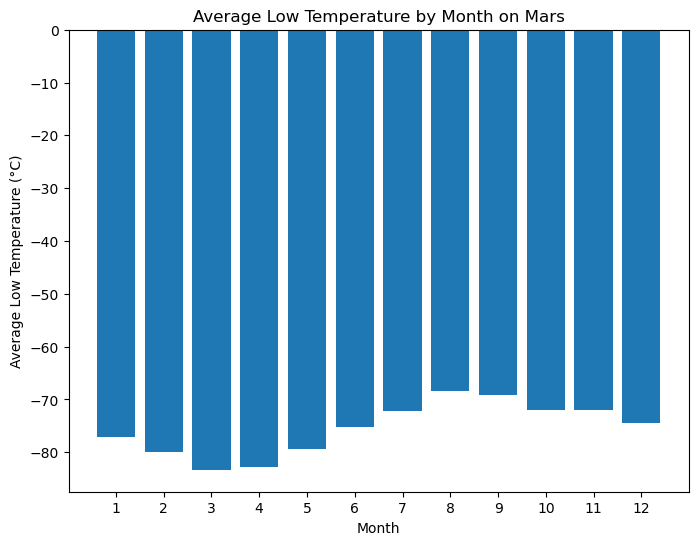

In [42]:
# Plot the average temperature by month
plt.figure(figsize=(8, 6))
plt.bar(average_temp_df['month'], average_temp_df['average_low_temp'])
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(average_temp_df['month'])
#plt.grid(True)
plt.show()

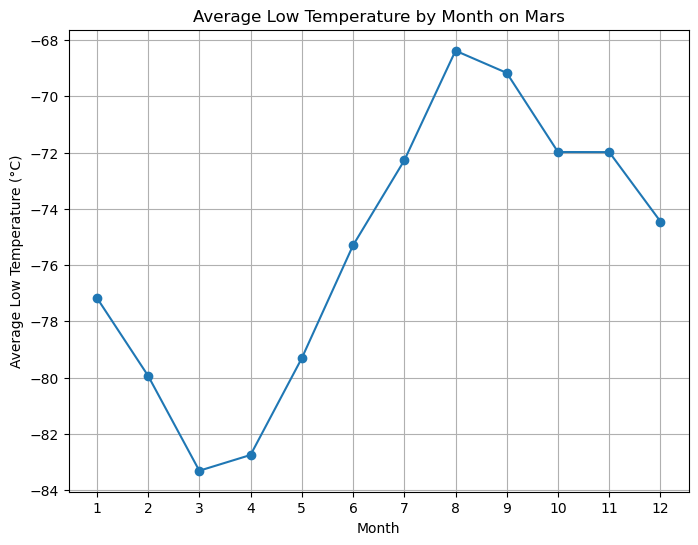

Third and Fourth are the coldest months as showed in the graph


In [52]:
# Identify the coldest and hottest months in Curiosity's location
# Plot the average temperature by month
plt.figure(figsize=(8, 6))
plt.plot(average_temp_df['month'], average_temp_df['average_low_temp'], marker='o', linestyle='-')
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(average_temp_df['month'])
plt.grid(True)
plt.show()

print("Third and Fourth are the coldest months as showed in the graph")

In [48]:
# 4. Average pressure by Martian month
# Group the data by month and calculate the average pressure
average_pressure_by_month = df_mars_2.groupby('month')['pressure'].mean()
average_pressure_by_month



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [49]:
average_pressure_by_month_df = pd.DataFrame({
    'month': average_pressure_by_month.index,
    'average_pressure': average_pressure_by_month.values
})
average_pressure_by_month_df

,month,average_pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


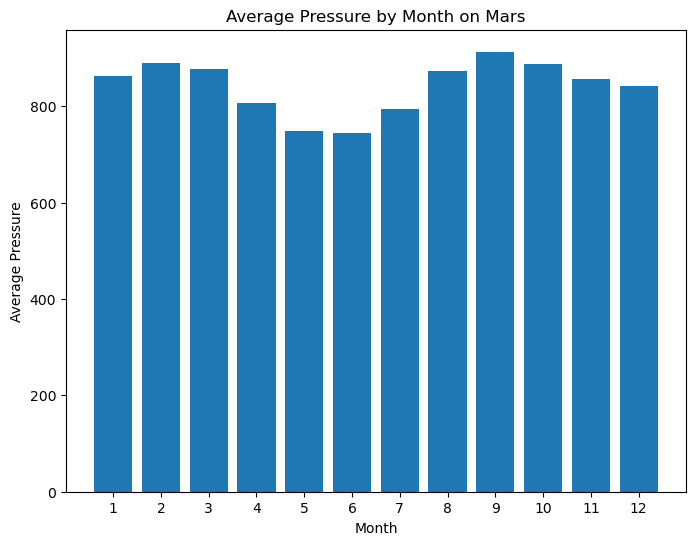

In [51]:
# Plot the average pressure by month
plt.figure(figsize=(8, 6))
plt.bar(average_pressure_by_month_df['month'], average_pressure_by_month_df['average_pressure'])
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(average_pressure_by_month_df['month'])
#plt.grid(True)
plt.show()

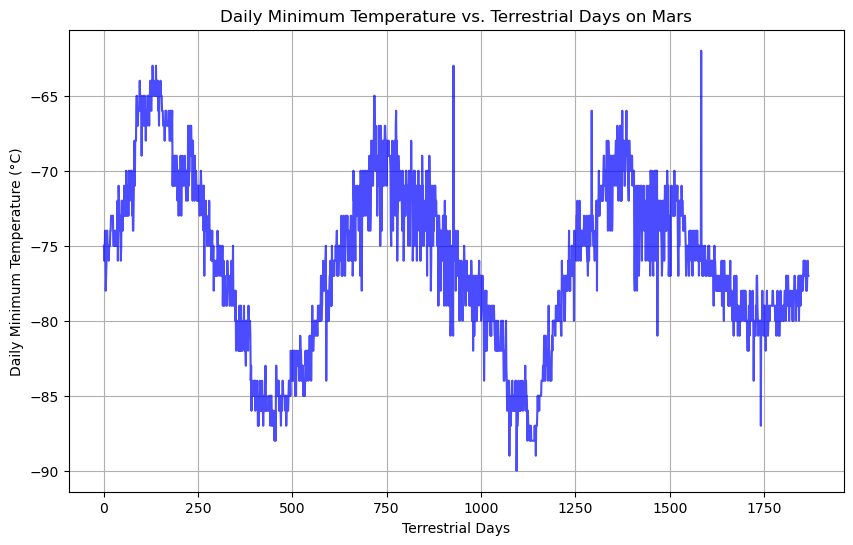

In [64]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# # Specify the Martian month for which you want to count Earth days
# target_month = 7 

# # Filter the dataset for the specified Martian month
# filtered_df = df_mars_2[df_mars_2['month'] == target_month]
# print(f"Earth Days in Martian Month:  {len(filtered_df)}")
# print(f"Earth Days in a Martin Year: {len(filtered_df)*6}")

# # Extract the first and last terrestrial dates from the filtered dataset
# first_terrestrial_date = pd.to_datetime(filtered_df['terrestrial_date'].iloc[0])
# last_terrestrial_date = pd.to_datetime(filtered_df['terrestrial_date'].iloc[-1])

# # Calculate the difference in Earth days between the first and last terrestrial dates
# earth_days_in_martian_month = (last_terrestrial_date - first_terrestrial_date).days

# # Display the result
# print("Earth Days in Martian Month {}: {}".format(target_month, earth_days_in_martian_month))

# Extract the daily minimum temperature and terrestrial days
min_temp = df_mars_2['min_temp']
terrestrial_days = range(1, len(min_temp) + 1)  # Generate a sequence of days

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(terrestrial_days, min_temp, c='blue', alpha=0.7)
plt.title('Daily Minimum Temperature vs. Terrestrial Days on Mars')
plt.xlabel('Terrestrial Days')
plt.ylabel('Daily Minimum Temperature (°C)')
plt.grid(True)

# Show the plot
plt.show()




On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [65]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
csv_path = '../Outcomes/mars_temperature_data.csv'
df_mars_2.to_csv(csv_path, index=False)

print(f"DataFrame exported to {csv_path}")




DataFrame exported to ../Outcomes/mars_temperature_data.csv


In [21]:
browser.quit()